In [15]:
from statistics import median

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
abalone_dataset = "../data/abalone.csv"
df = pd.read_csv(abalone_dataset)

In [17]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
576,I,0.56,0.425,0.140,0.9175,0.4005,0.1975,0.2600,10
3035,I,0.55,0.405,0.150,0.6755,0.3015,0.1465,0.2100,10
3549,I,0.50,0.365,0.125,0.5280,0.2290,0.1030,0.1645,9
3574,F,0.60,0.470,0.170,1.0805,0.4995,0.2245,0.3205,9
1835,I,0.41,0.335,0.105,0.3305,0.1405,0.0640,0.1050,7


In [20]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")
# Довольно маленький датасет для дальнейшего машинного обучения

4177 rows and 9 columns


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [28]:
df.isnull().sum()

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64

In [29]:
df.isnull().sum() / df.isnull().count() * 100
# Можно увидеть в полях Diameter, Whole weight ~2.3%, Shell weight пропущенные значения - от них нужно избавиться или заменить

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

In [31]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [33]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [34]:
df.duplicated().sum()
# Дубликатов нет - это хорошо

np.int64(0)

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

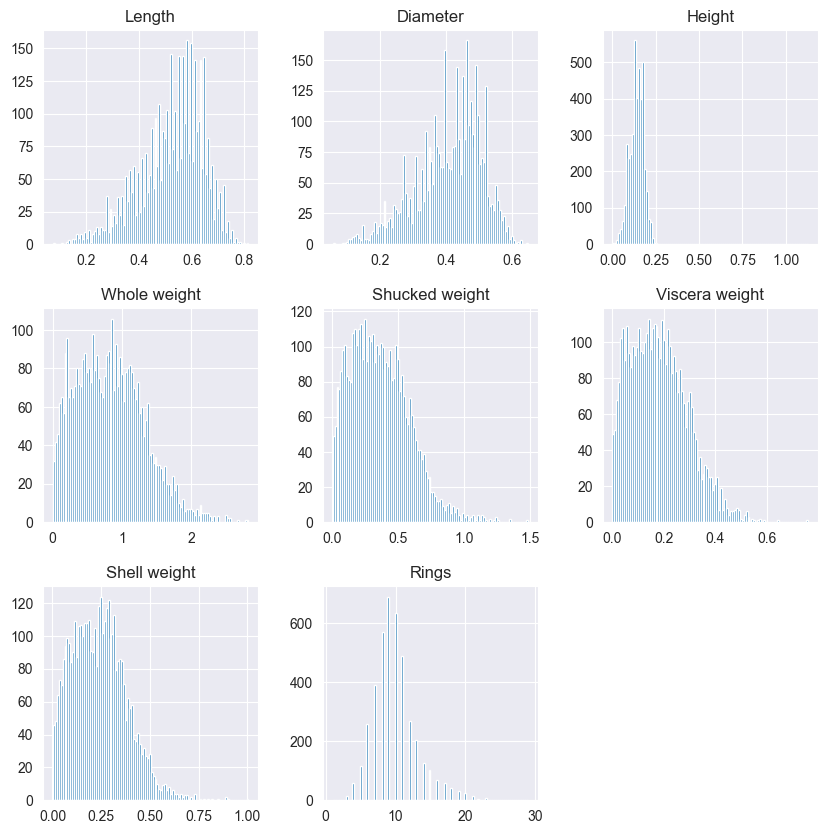

In [35]:
df.hist(bins=100, figsize=(10, 10))
# В целом по графикам можно сказать что данные почти нормальные, по крайней мере возраст очень хороший

In [37]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [39]:
median_diameter = df['Diameter'].median()
df['Diameter'] = df['Diameter'].fillna(median_diameter)

In [43]:
median_whole_weight = df['Whole weight'].median()
df['Whole weight'] = df['Whole weight'].fillna(median_whole_weight)

In [44]:
median_shell_weight = df['Shell weight'].median()
df['Shell weight'] = df['Shell weight'].fillna(median_shell_weight)

In [106]:
df.isnull()
# Заменил пропущенные значения медианами, что в контексте предметной области и выбросов доступно

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1048422,False,False,False,False,False,False,False,False,False
1048423,False,False,False,False,False,False,False,False,False
1048424,False,False,False,False,False,False,False,False,False
1048425,False,False,False,False,False,False,False,False,False


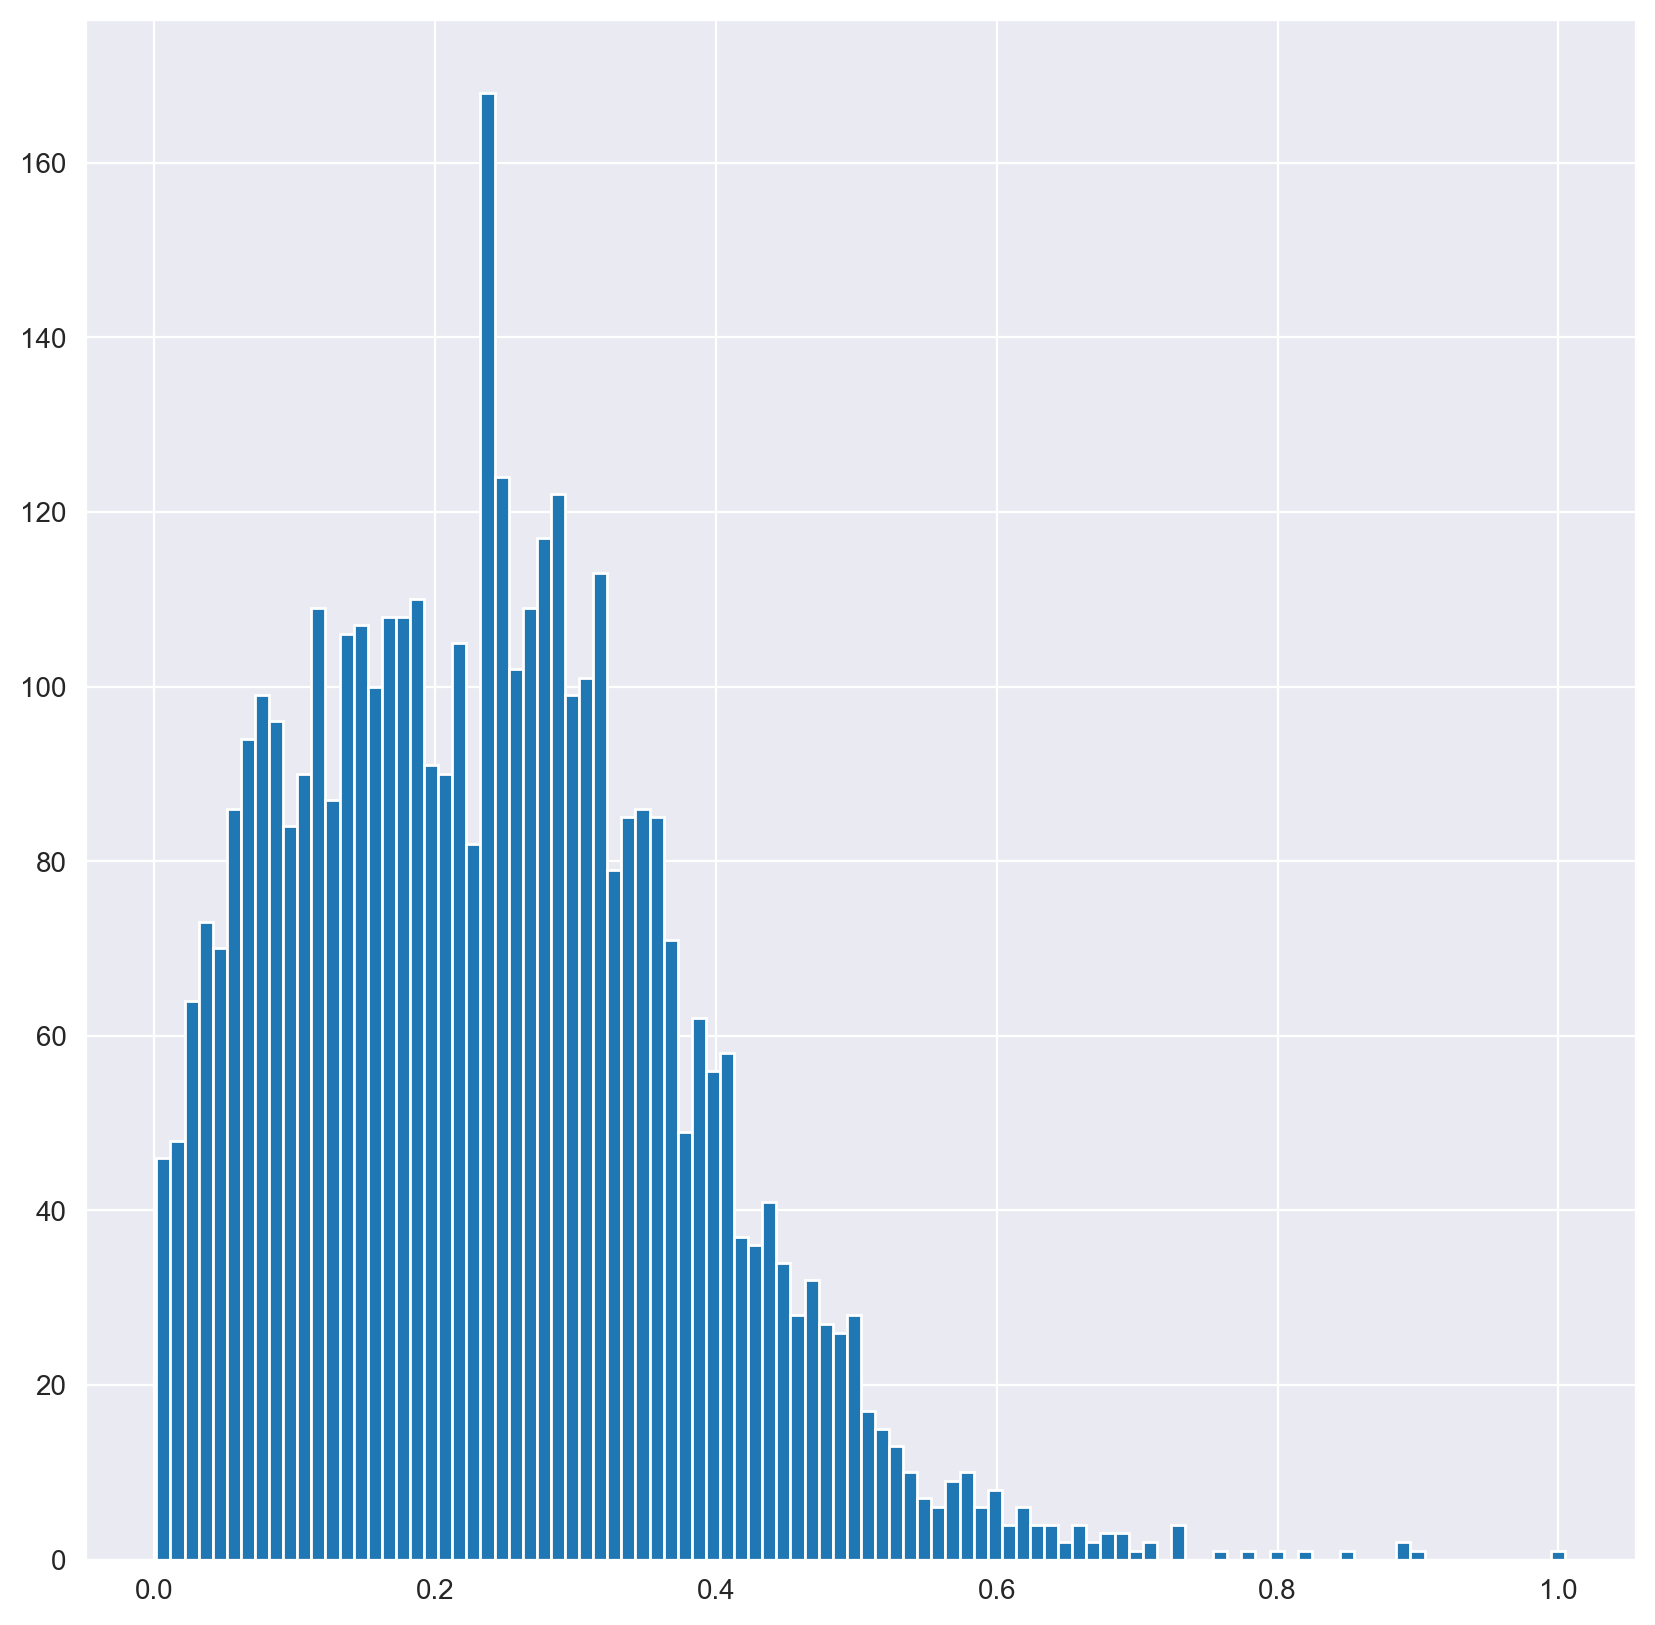

In [58]:
plt.figure(figsize=(10, 10), dpi=200);
plt.hist(df['Shell weight'], bins=100);

In [57]:
df['Shell weight'].min(), df['Shell weight'].max()

(np.float64(0.0015), np.float64(1.005))

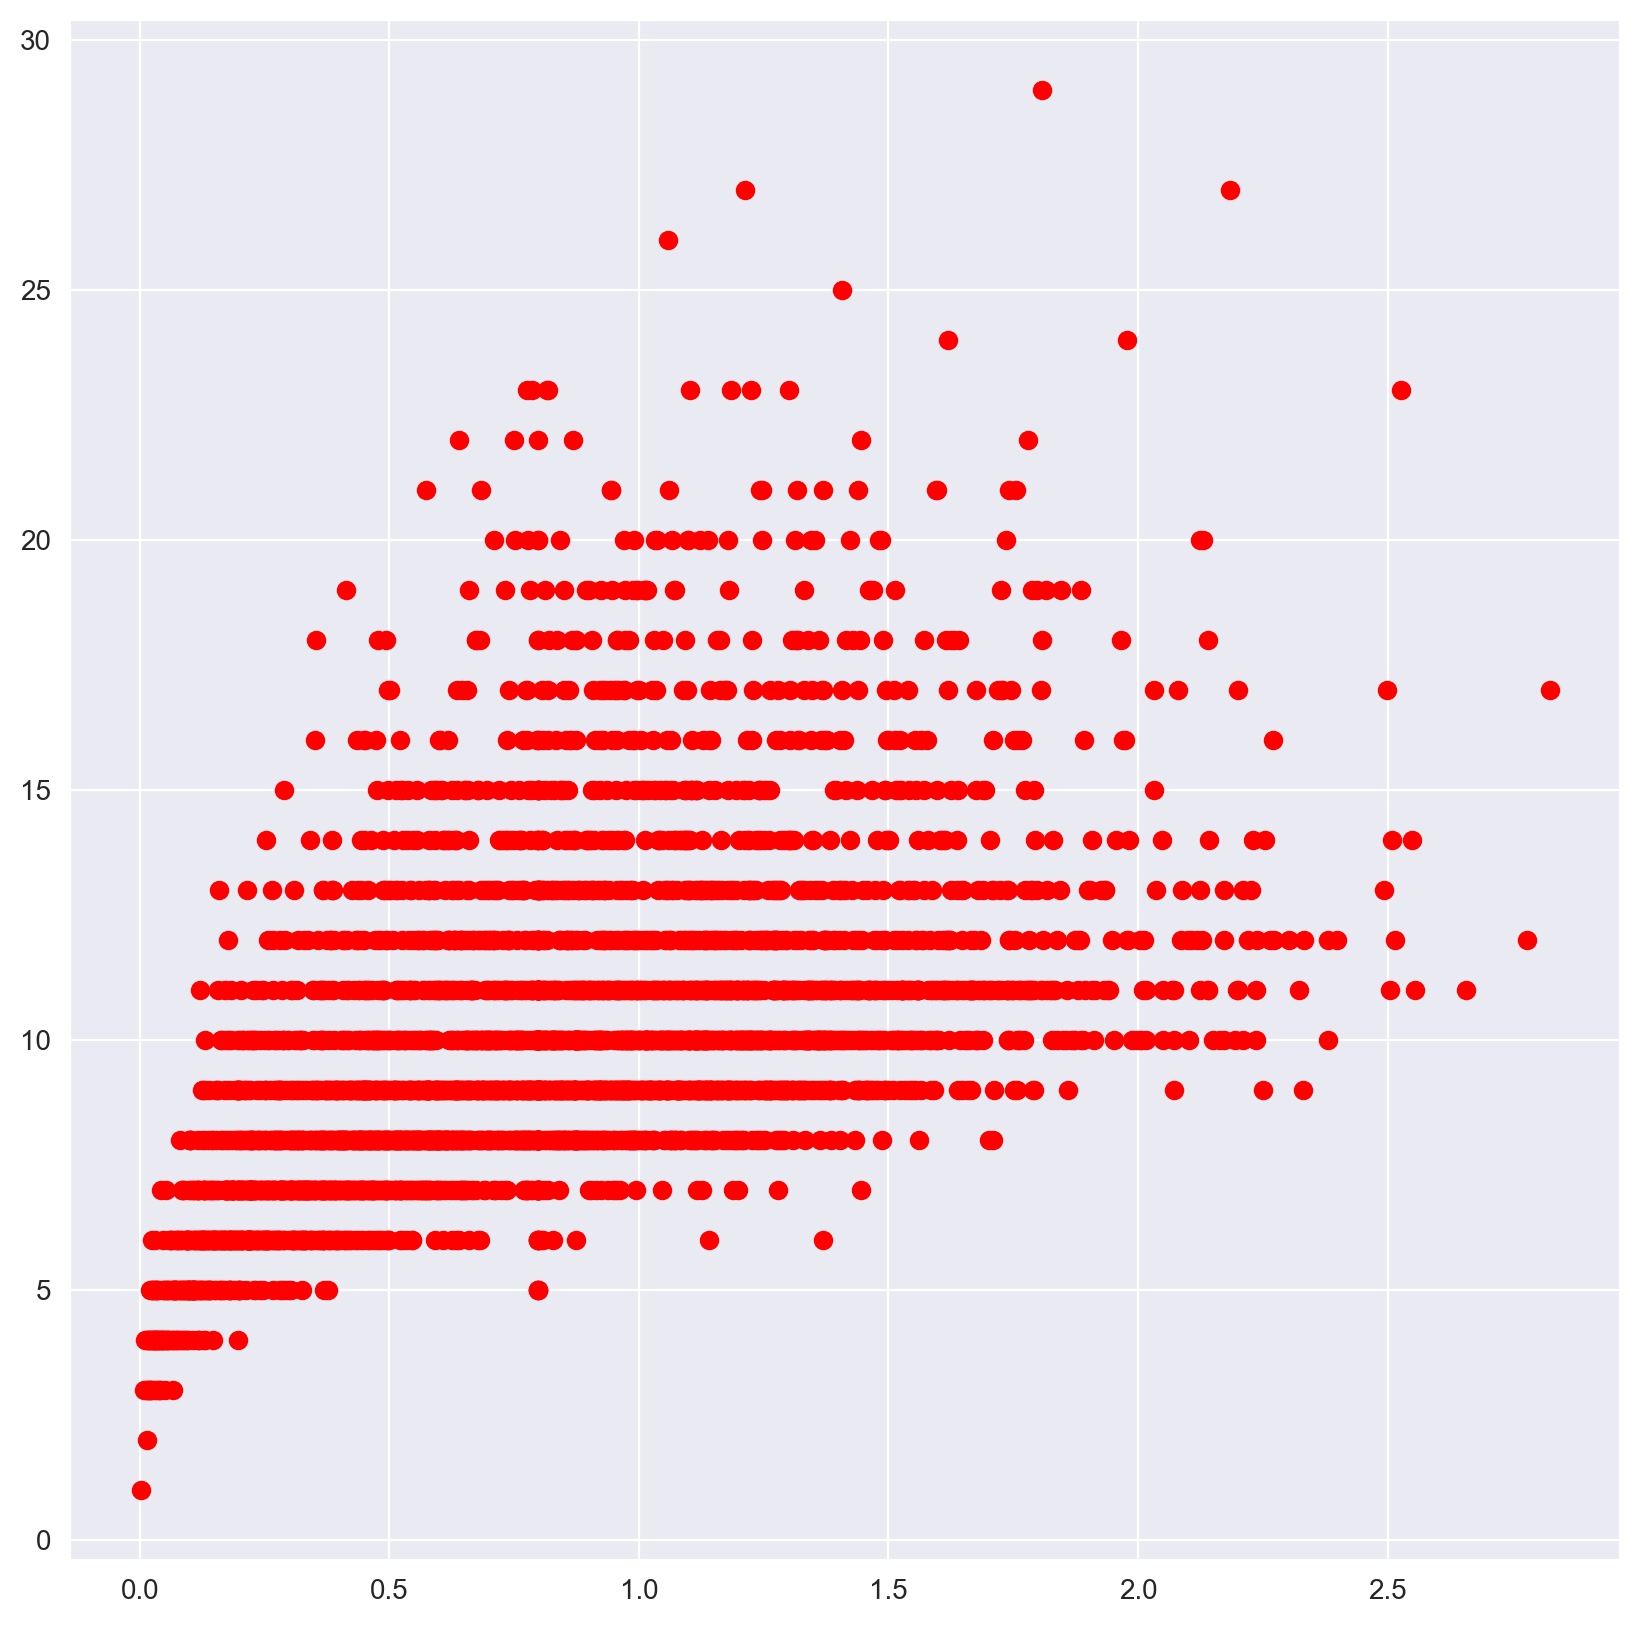

In [61]:
plt.figure(figsize=(10, 10), dpi=200);
plt.scatter(df['Whole weight'], df['Rings'], c='red');
# Видим что чем больше вес тем старше морское ушко

In [66]:
np.corrcoef(df['Whole weight'], df['Rings'])[0][1]

np.float64(0.5321491188953755)

In [73]:
corr = df.select_dtypes(exclude='object').corr(method='spearman')

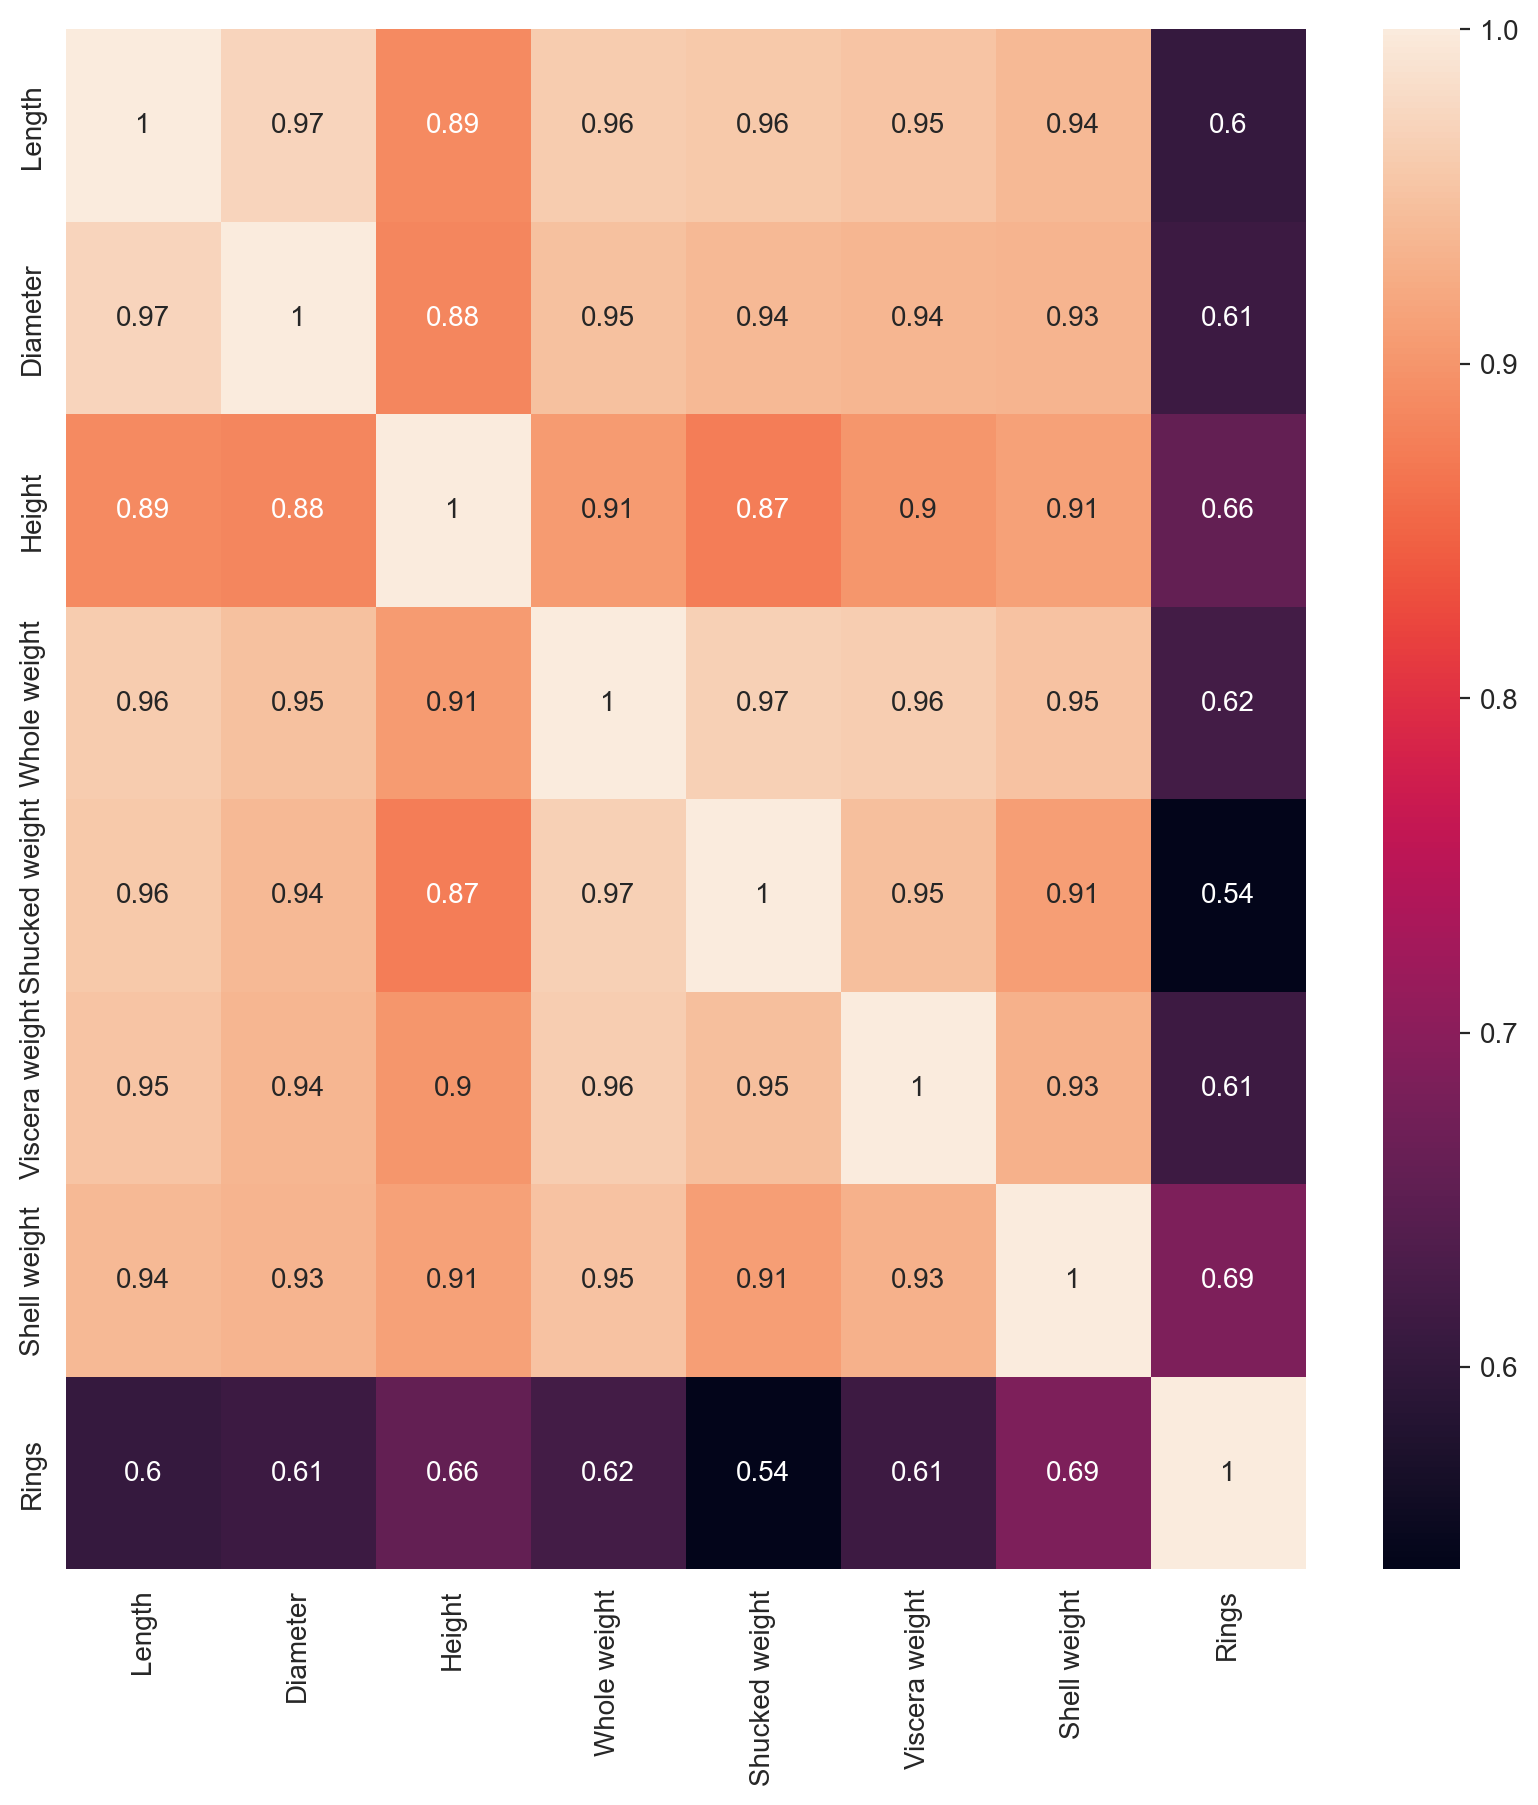

In [74]:
plt.figure(figsize=(10, 10), dpi=200);
sns.heatmap(corr, annot=True);
# По графику можно увидеть что все признаки влияют на возраст морского уха

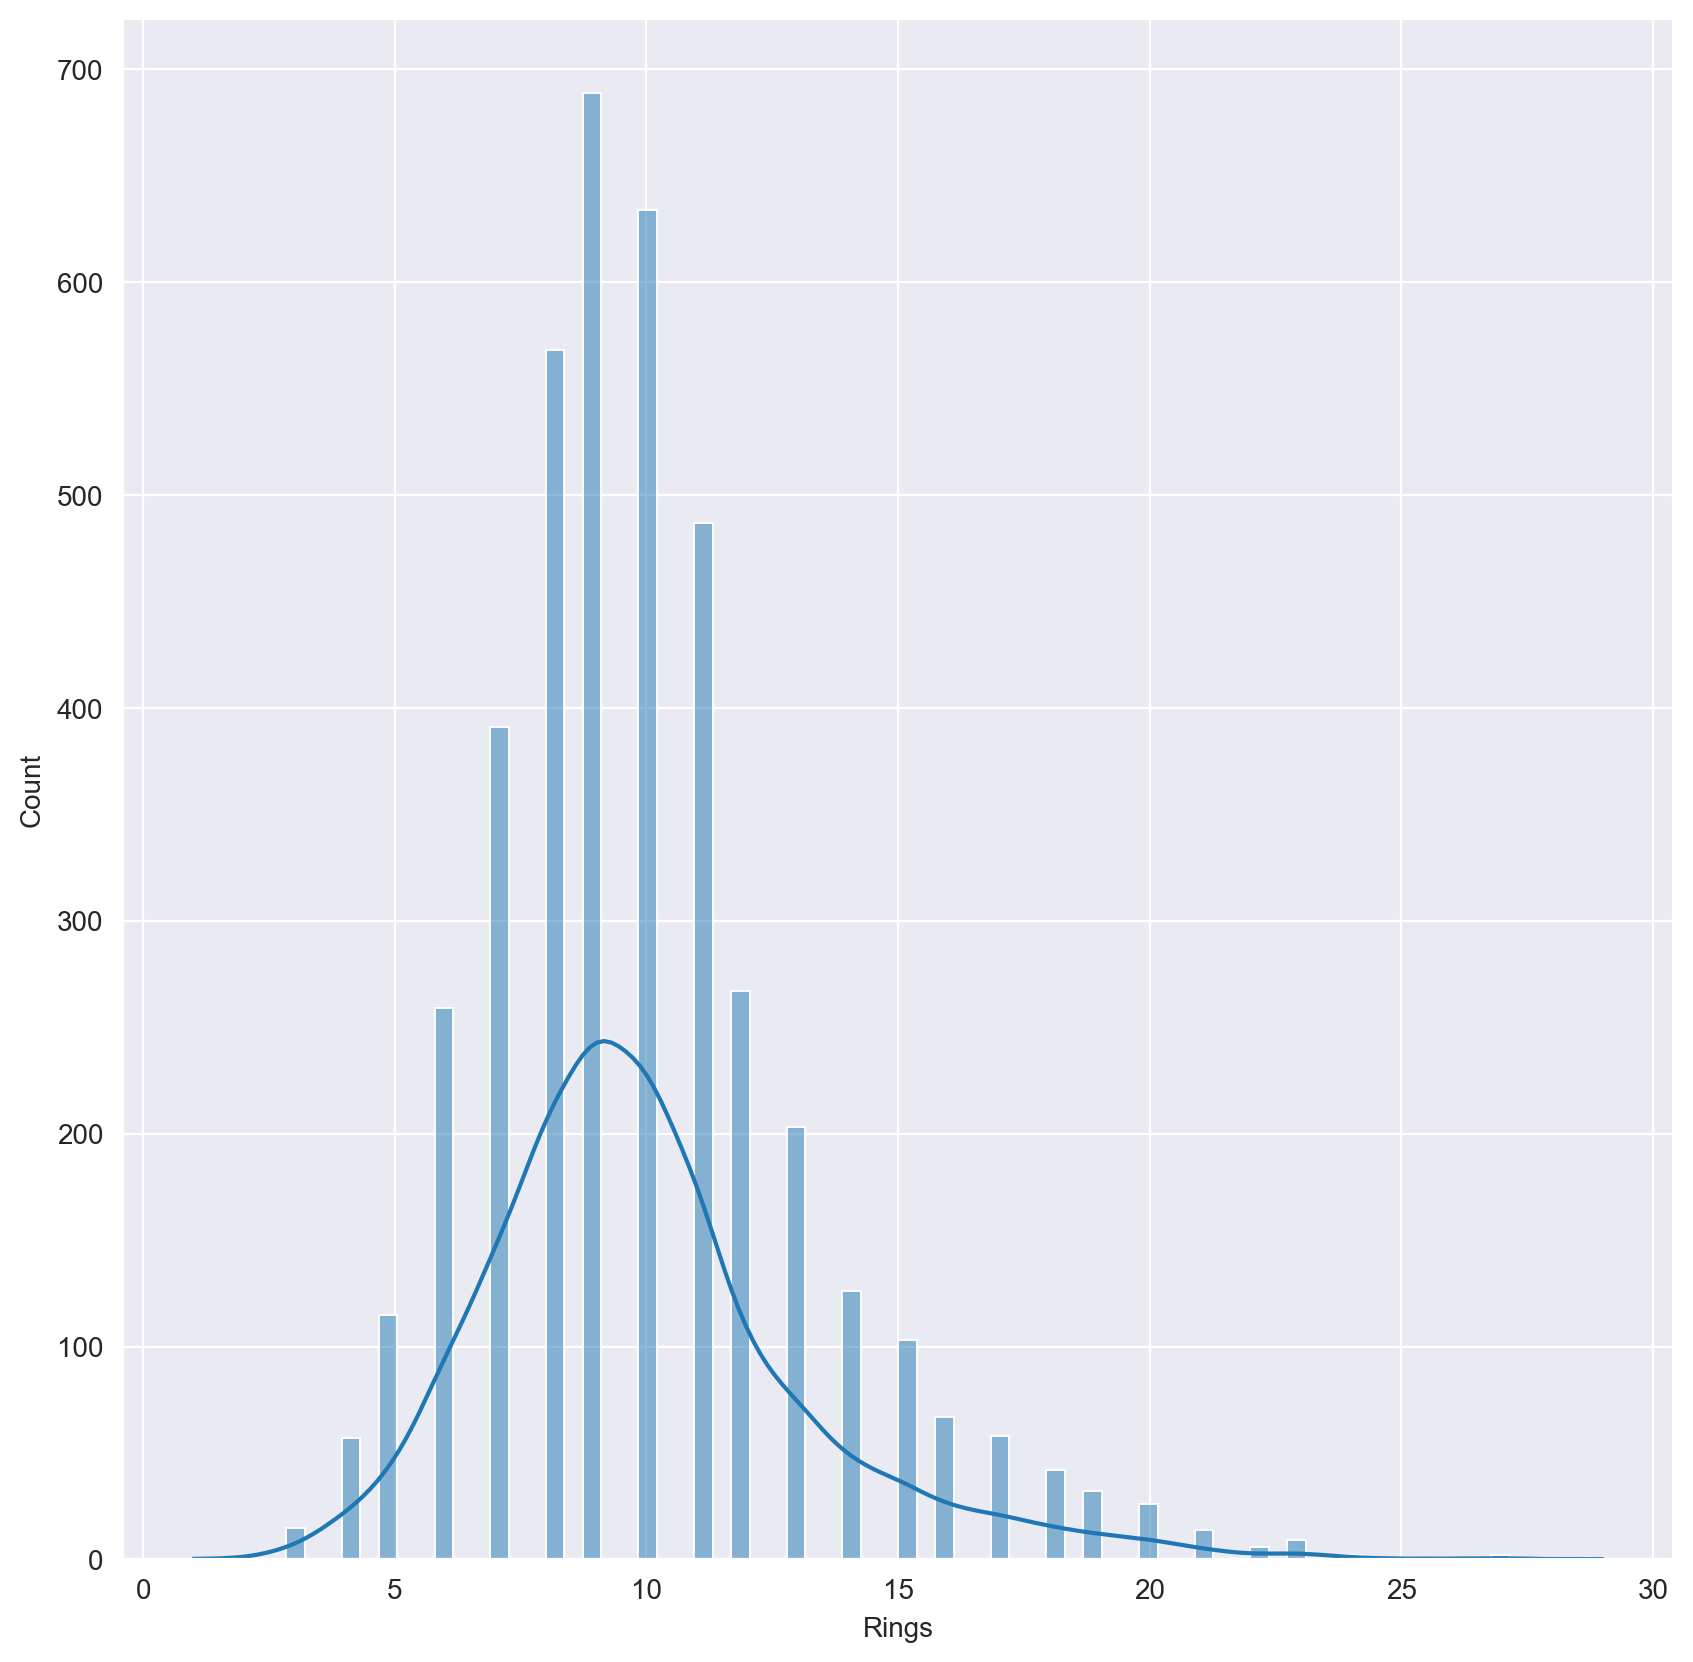

In [76]:
plt.figure(figsize=(10, 10), dpi=200);
sns.histplot(df['Rings'], kde=True);

In [83]:
import polars as pl

In [79]:
df_big = df.copy()

for _ in range(250):
    df_big = pd.concat([df_big, df])
df_big.to_csv('abalone_big.csv', index=False)

In [81]:
df_big.shape, df.shape

((1048427, 9), (4177, 9))

In [84]:
%%time
df_pl = pl.read_csv('../data/abalone_big.csv')
# Поларс намного тут быстрее аж в 10 раз

CPU times: total: 531 ms
Wall time: 61.3 ms


In [85]:
%%time
df = pd.read_csv('../data/abalone_big.csv')
# Пандас намного тут медленнее аж в 10 раз

CPU times: total: 516 ms
Wall time: 642 ms


In [86]:
%%time
df[['Whole weight', 'Diameter', 'Shell weight']]
# Для фильтрации тоже заметно существенное приемущество

CPU times: total: 0 ns
Wall time: 8.57 ms


,Whole weight,Diameter,Shell weight
0,0.5140,0.365,0.1500
1,0.2255,0.265,0.0700
2,0.6770,0.420,0.2100
3,0.7985,0.365,0.1550
4,0.2050,0.255,0.0550
...,...,...,...
1048422,0.8870,0.450,0.2490
1048423,0.9660,0.440,0.2605
1048424,1.1760,0.475,0.3080
1048425,1.0945,0.485,0.2960


In [87]:
%%time
df_pl[['Whole weight', 'Diameter', 'Shell weight']]
# Для фильтрации тоже заметно существенное приемущество

CPU times: total: 0 ns
Wall time: 999 μs


Whole weight,Diameter,Shell weight
f64,f64,f64
0.514,0.365,0.15
0.2255,0.265,0.07
0.677,0.42,0.21
0.7985,0.365,0.155
0.205,0.255,0.055
…,…,…
0.887,0.45,0.249
0.966,0.44,0.2605
1.176,0.475,0.308


In [90]:
%%time
df.query('Rings > 5')
# Для фильтрации тоже заметно существенное приемущество

CPU times: total: 109 ms
Wall time: 84.6 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1048425,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [91]:
%%time
df_pl.filter(pl.col('Rings') > 5)
# Для фильтрации тоже заметно существенное приемущество

CPU times: total: 109 ms
Wall time: 22 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…
"""F""",0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
"""M""",0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9


In [113]:
%%time

df.groupby('Rings').agg({'Whole weight' : 'mean', 'Diameter' : 'mean'})
# В группировке плюс-минус все одинаково

CPU times: total: 15.6 ms
Wall time: 18.4 ms


,Whole weight,Diameter
Rings,,
1,0.002000,0.055000
2,0.015000,0.100000
3,0.028400,0.149000
4,0.059605,0.173158
5,0.148917,0.219783
6,0.280286,0.279653
7,0.405465,0.323414
8,0.644640,0.385757
9,0.851355,0.424840


In [114]:
%%time

df_pl.group_by('Rings').agg([pl.mean('Whole weight'), pl.mean('Diameter')])
# В группировке плюс-минус все одинаково

CPU times: total: 46.9 ms
Wall time: 28.3 ms


Rings,Whole weight,Diameter
i64,f64,f64
24,1.79875,0.54
3,0.0284,0.149
12,1.094582,0.462416
18,1.153179,0.462024
6,0.280286,0.279653
…,…,…
26,1.0575,0.495
23,1.170389,0.456667
14,1.073008,0.45754


In [100]:
%%time

q = df_pl.lazy().group_by('Rings').agg([pl.mean('Whole weight'), pl.mean('Diameter')])

CPU times: total: 0 ns
Wall time: 0 ns


In [104]:
q

In [105]:
%%time

q.collect()

CPU times: total: 15.6 ms
Wall time: 24.2 ms


Rings,Whole weight,Diameter
i64,f64,f64
6,0.280286,0.279653
9,0.851355,0.42484
3,0.0284,0.149
27,1.698,0.5
12,1.094582,0.462416
…,…,…
8,0.64464,0.385757
26,1.0575,0.495
5,0.148917,0.219783
